# Synthetic data (static barcoding)

We simulated a differentiation process over a bifurcation fork. In this simulation, 
cells are barcoded in the beginning, and the barcodes remain un-changed. In the simulation we resample clones over time, like the experimental design to obtain the hematopoietic dataset 
or the reprogramming dataset. The dataset has two time points.  

In [1]:
import cospar as cs

## Initialization and Preprocessing 

### Loading data

In [2]:
adata_orig=cs.datasets.synthetic_bifurcation_static_BC()

try downloading from url
https://kleintools.hms.harvard.edu/tools/downloads/cospar/bifurcation_static_BC_adata_preprocessed.h5ad
... this may take a while but only happens once


In [3]:
adata_orig

AnnData object with n_obs × n_vars = 2474 × 50
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des'
    obsm: 'X_clone', 'X_emb', 'X_pca'

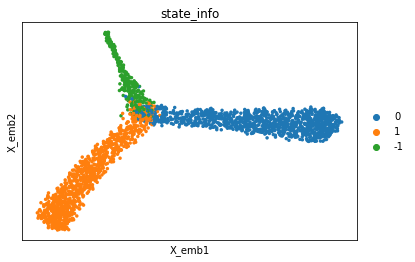

In [5]:
cs.pl.embedding(adata_orig,color='state_info')

### Raw clonal data analysis (without using state information)

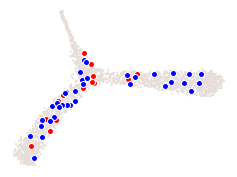

In [6]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1])

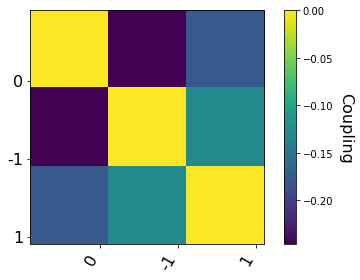

In [7]:
plot_time_point='2'
cs.pl.fate_coupling_from_clones(adata_orig,plot_time_point, selected_fates=[], color_bar=True)

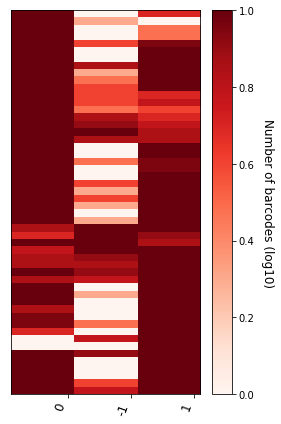

In [8]:
plot_time_point='2'
cs.pl.barcode_heatmap(adata_orig,plot_time_point, selected_fates=[], color_bar=True)

Current clone id: 0
Current clone id: 5
Current clone id: 10
Current clone id: 15
Current clone id: 20
Current clone id: 25
Current clone id: 30
Current clone id: 35
Current clone id: 40
Current clone id: 45
Current clone id: 50


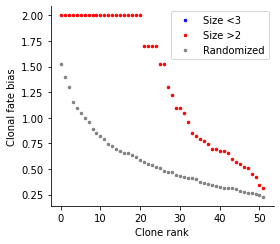

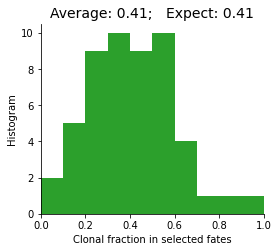

In [9]:
select_fate_cluster='1'
clonal_fate_bias,clone_id=cs.pl.clonal_fate_bias(adata_orig,select_fate_cluster,N_resampling=100)

## Transition map inference

### Transition map from multiple clonal time points.

-------Step 1: Select time points---------
--> Clonal cell fraction (day 1-2): 1.0
--> Clonal cell fraction (day 2-1): 1.0
--> Numer of cells that are clonally related -- day 1: 854  and day 2: 1620
Valid clone number 'FOR' post selection 52
Cell number=2474, Clone number=52
-------Step 2: Compute the full Similarity matrix if necessary---------
Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.0065500736236572266
Smooth round: 2
--> Time elapsed: 0.04064488410949707
--> Orignal sparsity=0.18047254911058844, Thresholding
--> Final sparsity=0.16805970451629854
similarity matrix truncated (Smooth round=2):  0.10501980781555176
Smooth round: 3
--> Time elapsed: 0.2107398509979248
--> Orignal sparsity=0.36128591024912937, Thresholding
--> Final sparsity=0.3115755514586951
similarity matrix truncated (Smooth round=3):  0.11839008331298828
Smooth round: 4
--> Time elapsed: 0.28410983085632324
--> Orignal sparsity=0.4542983487444851, Thresholding
--> Final

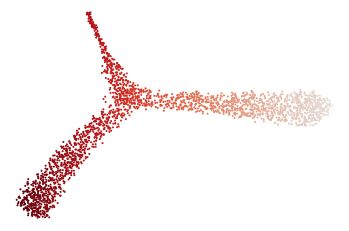

In [10]:
use_full_Smatrix=True 
noise_threshold=0.2 # 
selected_clonal_time_points=['1','2']
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,selected_clonal_time_points,smooth_array=[10,10,10],
            CoSpar_KNN=20,noise_threshold=noise_threshold,demulti_threshold=noise_threshold,
             use_full_Smatrix=use_full_Smatrix,use_all_cells=False)

Generate demultiplexed map within each clone (Optional, as this map has been generated already)

In [11]:
run_demultiplex=False
if run_demultiplex:
    demulti_threshold=0.2 # This threshold should be smaller, ass the map has been further smoothed to expand to more states.
    cs.tmap.infer_intraclone_Tmap(adata,demulti_threshold=demulti_threshold)

Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0


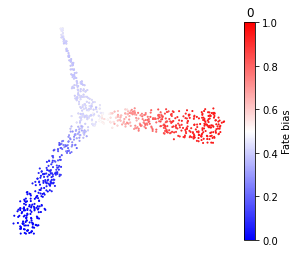

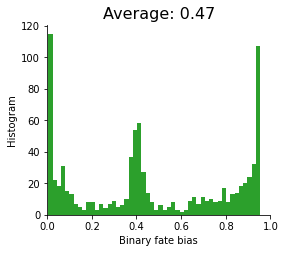

In [12]:
cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['0','1'],used_map_name='transition_map',
            plot_time_points=[],plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)

### Transition map from a single clonal time point

In [13]:
initial_time_points=['1']
clonal_time_point='2'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points,clonal_time_point,
     Clone_update_iter_N=1,initialize_method='OT',smooth_array=[10,10,10],
                        noise_threshold=0.2,compute_new=False)

-------------------------------New Start--------------------------------------------------
Current time point: 1
-----------Pre-processing and sub-sampling cells------------
----------------
Step 1: Use OT method for initialization
Compute new shortest path distance matrix
--> Chosen mode is distances
Finishing computing shortest-path distance, used time 3.174316883087158
Compute new custon OT matrix
OT solver: duality_gap
Finishing computing optial transport map, used time 3.236064910888672
----------------
Step 2: Jointly optimize the transition map and the initial clonal states!
Joint optimization that consider possibility of clonal overlap: v2
--> original clone shape: (2474, 52)
--> After excluding zero-sized clones at t2: (2474, 52)
Sort clones by size (small to large)
Infer the number of initial cells to extract for each clone in advance
--> Inferring early clonal states: current clone id 0
---------Compute the transition map-----------
Compute similarity matrix: computing new; 

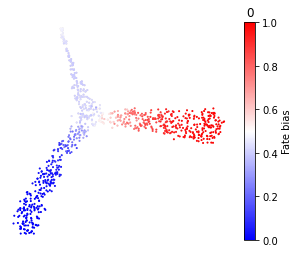

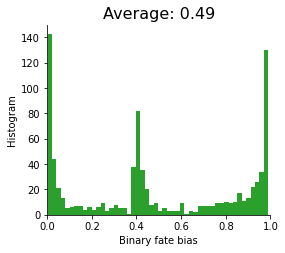

In [14]:
cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['0','1'],used_map_name='transition_map',
            plot_time_points=[],plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)

## Transition amp from only the clonal information

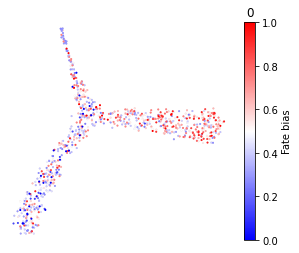

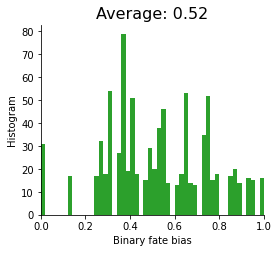

In [15]:
 cs.tmap.infer_Tmap_from_clonal_info_alone(adata)

cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['0','1'],used_map_name='clonal_transition_map',
            plot_time_points=[],plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)